# Decathlon - Hackaton 2022





___

___

## EDA - Exploratory Data Analysis:


In [32]:
#Import the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})

import warnings
warnings.filterwarnings("ignore")


___

In [5]:
#Import the DataSet:
df_prod= pd.read_csv('prods_IT.csv')
df_prod.head()

,modeild,weblabel,brand,catchline,productnature,family,Review-AverageRating,DisplayPrice-Amount,ListPrice-Amount
0,8071204,REGULADOR DE RED DE TENIS,ARTENGO,Indispensable para una buena altura de red.,REDES,EQUIPAMIENTO COACH/CLUB,5.0,9.99,9.99
1,8071566,PELOTA DE TENIS POLIVALENTE TB920 *4 AMARILLO,ARTENGO,¡Durabilidad y control!Pelota oficial del torn...,Pelota de tenis,PELOTAS TENIS,4.5,5.99,5.99
2,8071569,PELOTA DE TENIS TB530 *4 AMARILLO,ARTENGO,¡Pelota de competición a bajo precio!Nuevo emp...,Pelota de tenis,PELOTAS TENIS,4.5,4.49,4.49
3,8072596,CORDAJE DE TENIS BABOLAT MULTIFILAMENTOS XCEL ...,BABOLAT,Este cordaje de tenis multifilamentos Babolat ...,Cordaje raqueta,CORDAJES TENIS,4.7,14.99,14.99
4,8072605,Cordaje Tenis Monofilamento Big Banger Alu Pow...,LUXILON,Este cordaje de tenis monofilamento Luxilon Al...,Cordaje raqueta,CORDAJES TENIS,4.3,14.99,14.99


In [6]:
#Import the DataSet:
df_user= pd.read_csv('users_IT.csv')
df_user.head()

,person_id,complete_name,age,address
0,d0eb7350-ce10-42a2-bab1-cb66319bdfa6,Leah Wright,26,"5942 Phillip Ridge\nWest Hannah, WA 76733"
1,06ada2a9-ec6e-4306-b83b-33af4489fca0,Jonathan Hill,26,"390 Shelley Ways\nBoydburgh, NY 48020"
2,acf71426-adca-4f48-87d6-4978dc538448,Anne Dougherty,28,USCGC Thompson\nFPO AE 51140
3,07017851-e9cc-40d2-a0f3-e82819761e72,Lydia Hall,41,"5511 Miller Dam\nWest Michael, UT 03004"
4,d116bb8a-43df-42a5-9575-5af33e088ec9,Brianna Washington,28,"70072 John Keys\nNew Amandaport, OH 85289"


In [16]:
#Import the DataSet:
df_reco= pd.read_csv('recomendations_train_IT.csv')
df_reco.head()

,reco_id,time_reco,id_sender,id_reciever,id_product,product_bought
0,5dc916dc-6fa3-488f-8ad2-fd14100fa113,2008-02-09 17:58:24,5565ac1e-4c2a-4fd8-b990-7a11d594dc0e,13a6c635-2f20-4e22-9e76-c3761d1111be,8605674,1
1,e9b6a2bb-58d4-4e62-8fda-239da00e42a1,1995-06-17 04:27:17,4c1e438a-2b8c-4f84-a22a-869eea346661,84f27bd9-0d26-4f84-b585-cca0e4bbd1d5,8603017,1
2,91a31be2-e71f-436a-917e-1ac65cc9ef2e,2002-04-10 19:26:53,51c3fb8f-c26f-4808-a69a-3f728256cf7a,8c333f9b-af38-4a0c-8bdc-428ffa061312,8763489,1
3,b69901f9-c70b-4133-be43-cc6116f1c8fd,2015-07-31 11:41:37,45e9a922-e602-4e8f-be77-d6486779ae0f,5f9dfbb7-8bca-494a-802e-f11f12c9906a,8607307,1
4,0ccdd3e7-a1cb-43fd-814d-a501278c9f9c,2001-04-06 20:20:43,250343f4-b757-4c3f-aaea-d7d3ddb14744,34d40a00-18f9-4fa5-9973-ffd5d8663c6f,8372995,1


In [101]:
df_user = pd.read_csv("prods_IT.csv")
df_reco = pd.read_csv("recomendations_train_IT.csv")
df_prod = pd.read_csv("users_IT.csv")
df_all = pd.concat([df_user,df_reco,df_prod], axis = 1)
df_all

,modeild,weblabel,brand,catchline,productnature,family,Review-AverageRating,DisplayPrice-Amount,ListPrice-Amount,reco_id,time_reco,id_sender,id_reciever,id_product,product_bought,person_id,complete_name,age,address
0,8071204.0,REGULADOR DE RED DE TENIS,ARTENGO,Indispensable para una buena altura de red.,REDES,EQUIPAMIENTO COACH/CLUB,5.0,9.99,9.99,5dc916dc-6fa3-488f-8ad2-fd14100fa113,2008-02-09 17:58:24,5565ac1e-4c2a-4fd8-b990-7a11d594dc0e,13a6c635-2f20-4e22-9e76-c3761d1111be,8605674,1,d0eb7350-ce10-42a2-bab1-cb66319bdfa6,Leah Wright,26.0,"5942 Phillip Ridge\nWest Hannah, WA 76733"
1,8071566.0,PELOTA DE TENIS POLIVALENTE TB920 *4 AMARILLO,ARTENGO,¡Durabilidad y control!Pelota oficial del torn...,Pelota de tenis,PELOTAS TENIS,4.5,5.99,5.99,e9b6a2bb-58d4-4e62-8fda-239da00e42a1,1995-06-17 04:27:17,4c1e438a-2b8c-4f84-a22a-869eea346661,84f27bd9-0d26-4f84-b585-cca0e4bbd1d5,8603017,1,06ada2a9-ec6e-4306-b83b-33af4489fca0,Jonathan Hill,26.0,"390 Shelley Ways\nBoydburgh, NY 48020"
2,8071569.0,PELOTA DE TENIS TB530 *4 AMARILLO,ARTENGO,¡Pelota de competición a bajo precio!Nuevo emp...,Pelota de tenis,PELOTAS TENIS,4.5,4.49,4.49,91a31be2-e71f-436a-917e-1ac65cc9ef2e,2002-04-10 19:26:53,51c3fb8f-c26f-4808-a69a-3f728256cf7a,8c333f9b-af38-4a0c-8bdc-428ffa061312,8763489,1,acf71426-adca-4f48-87d6-4978dc538448,Anne Dougherty,28.0,USCGC Thompson\nFPO AE 51140
3,8072596.0,CORDAJE DE TENIS BABOLAT MULTIFILAMENTOS XCEL ...,BABOLAT,Este cordaje de tenis multifilamentos Babolat ...,Cordaje raqueta,CORDAJES TENIS,4.7,14.99,14.99,b69901f9-c70b-4133-be43-cc6116f1c8fd,2015-07-31 11:41:37,45e9a922-e602-4e8f-be77-d6486779ae0f,5f9dfbb7-8bca-494a-802e-f11f12c9906a,8607307,1,07017851-e9cc-40d2-a0f3-e82819761e72,Lydia Hall,41.0,"5511 Miller Dam\nWest Michael, UT 03004"
4,8072605.0,Cordaje Tenis Monofilamento Big Banger Alu Pow...,LUXILON,Este cordaje de tenis monofilamento Luxilon Al...,Cordaje raqueta,CORDAJES TENIS,4.3,14.99,14.99,0ccdd3e7-a1cb-43fd-814d-a501278c9f9c,2001-04-06 20:20:43,250343f4-b757-4c3f-aaea-d7d3ddb14744,34d40a00-18f9-4fa5-9973-ffd5d8663c6f,8372995,1,d116bb8a-43df-42a5-9575-5af33e088ec9,Brianna Washington,28.0,"70072 John Keys\nNew Amandaport, OH 85289"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b15fcb43-75a5-4a7a-904e-1707686d57a1,1991-01-12 11:28:16,e3d1e9ab-01fb-4ade-ae58-8449f8fbe742,6d1012bc-d57d-4095-87f9-8ef9767987d5,8561587,0,NaN,NaN,NaN,NaN
6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4b5d39cf-2b39-4b84-8052-d94b14193f69,2004-04-21 20:41:31,807a90a6-3103-4cef-944a-304a663b58e1,30edad71-d3f3-479f-87ad-f093880ccf80,8667378,1,NaN,NaN,NaN,NaN
6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50349b56-4dbe-4da4-8145-4abd1f485b94,1977-01-02 22:35:35,81bf0b99-99aa-4211-92be-2315810ee347,cc410d52-c17b-4b93-b07e-e217a75738c6,8487421,1,NaN,NaN,NaN,NaN
6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11c4e42c-048b-454f-9dba-8943234fb752,1986-09-17 09:24:18,8e2cb852-2d27-4a31-8c63-349f9061e641,0c504bb9-49a6-4676-978c-95364a3f06e5,8752744,0,NaN,NaN,NaN,NaN


In [153]:
df_all.notnull().sum()

modeild                 4866
weblabel                4866
brand                   4866
catchline               4866
productnature           4866
family                  4866
Review-AverageRating    4866
DisplayPrice-Amount     4866
ListPrice-Amount        4866
reco_id                 7000
time_reco               7000
id_sender               7000
id_reciever             7000
id_product              7000
product_bought          7000
person_id                300
complete_name            300
age                      300
address                  300
dtype: int64

In [108]:
df_user.columns

Index(['modeild', 'weblabel', 'brand', 'catchline', 'productnature', 'family',
       'Review-AverageRating', 'DisplayPrice-Amount', 'ListPrice-Amount'],
      dtype='object')

In [107]:
df_reco.columns

Index(['reco_id', 'time_reco', 'id_sender', 'id_reciever', 'id_product',
       'product_bought'],
      dtype='object')

In [44]:
df=df_all

In [45]:
df.shape

(12166, 19)

In [49]:
#Some statics from our Data Set:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
modeild,4866.0,8382183.18,1266199.36,760877.00,8548284.75,8605669.00,8667446.00,8808220.00
Review-AverageRating,4866.0,3.82,1.65,0.00,4.10,4.50,4.70,5.00
DisplayPrice-Amount,4866.0,41.15,66.35,0.99,9.99,22.99,54.99,1349.99
ListPrice-Amount,4866.0,42.64,66.80,0.99,11.99,24.99,54.99,1349.99
id_product,7000.0,8396677.99,1246082.00,860634.00,8552495.00,8607990.00,8667576.00,8808220.00
product_bought,7000.0,0.61,0.49,0.00,0.00,1.00,1.00,1.00
age,300.0,29.95,8.19,16.00,23.75,29.00,37.00,45.00


In [4]:
#Information and type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modeild               4866 non-null   int64  
 1   weblabel              4866 non-null   object 
 2   brand                 4866 non-null   object 
 3   catchline             4866 non-null   object 
 4   productnature         4866 non-null   object 
 5   family                4866 non-null   object 
 6   Review-AverageRating  4866 non-null   float64
 7   DisplayPrice-Amount   4866 non-null   float64
 8   ListPrice-Amount      4866 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 342.3+ KB


___

In [82]:
recomendados= df_reco['reco_id'].value_counts().sum()
recomendados


7000

In [81]:
comprados= df_reco['product_bought']==1
comprados.value_counts()

True     4302
False    2698
Name: product_bought, dtype: int64

In [75]:
porcentaje_ = 4302/recomendados
porcentaje_.astype('int64')
porcentaje_

0.6145714285714285

___

___

In [77]:
#Counting the values for each class:
total_classes= df['product_bought'].value_counts()
total_classes

1.0    4302
0.0    2698
Name: product_bought, dtype: int64

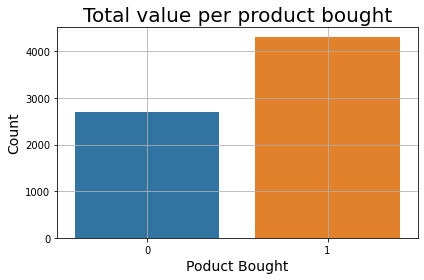

In [76]:
# Analyzing the target variable

#Set colors of each bar
c = ['green', 'red']

sns.countplot(df_reco['product_bought'])
plt.title("Total value per product bought",fontsize=20)

plt.ylabel("Count", fontsize=14)
plt.xlabel("Poduct Bought", fontsize=14)

plt.grid()
plt.tight_layout()
plt.show()



The graph shows that we have more data on benign tumors than malignant tumors. 

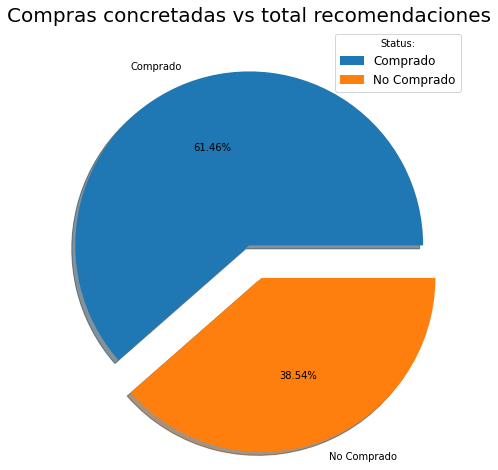

In [152]:
#Donut Chart with the total of each cluster.
sizes = np.array([4302, 2698])
plt.figure(figsize=(8,8))
labels = ["Comprado", "No Comprado"]
explode = [0,0.2]
plt.pie(sizes, labels = labels, autopct='%.2f%%', explode=explode, shadow=True)

plt.title("Compras concretadas vs total recomendaciones",fontsize=20)
plt.legend(title= "Status:", fontsize=12, loc="best")

plt.savefig('PiePlot.png')

plt.show()

El 60% del total de recomendaciones terminan concretando su compra.

___

In [140]:
numeric_cols = df_all.select_dtypes(include=['float64', 'int'])#.columns.to_list()

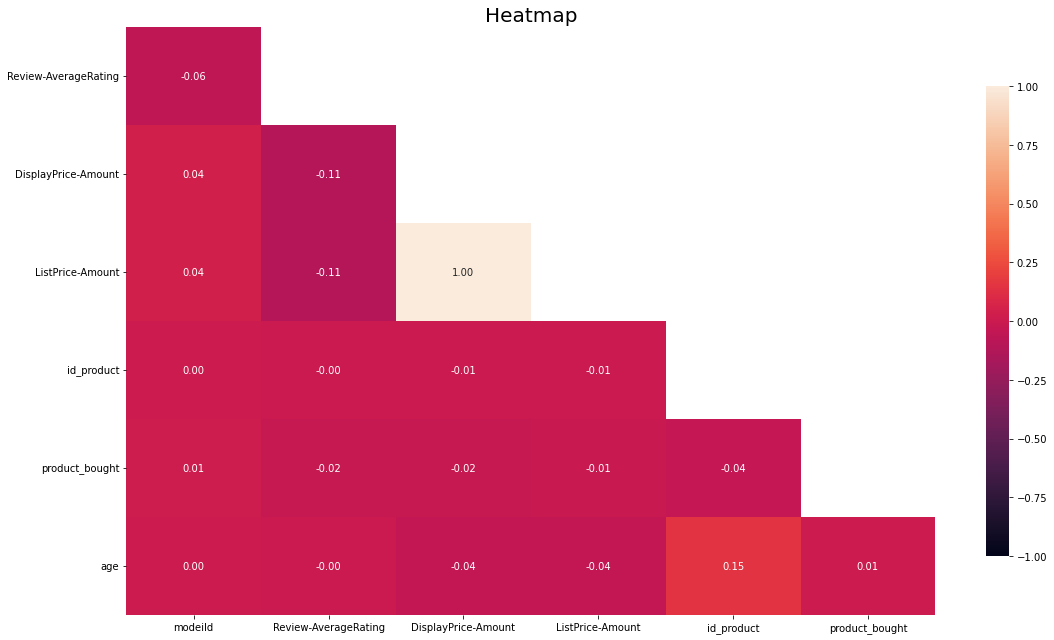

In [141]:
#Correlation:
corr = numeric_cols.corr()

#Lets plot a HeatMap:
np.ones_like(corr, dtype=bool)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(corr, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = corr.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap",  fontsize=20)
plt.tight_layout()
plt.show()

This heat plot shows the correlation of our variables where the values can oscillate between -1 and 1, being positive correlation if it is greater than 0 or negative correlation if it is less than 0. Positive correlation means that when a value of our column increases, the columns with positive correlation on it will also increase, but if they have negative correlation when one value increases the other decreases.
In this way we can easily know which columns correlate more than others.

Here we see better how our variables are related, what is curious is that only one value has a negative correlation, one could almost say that it is neutral because the value is close to 0. But most of the columns have positive correlation and are strongly correlated with each other, which is very interesting when making a machine learning model and gives us good indications that we can get good results.
___

In [90]:
df_all.columns

Index(['modeild', 'weblabel', 'brand', 'catchline', 'productnature', 'family',
       'Review-AverageRating', 'DisplayPrice-Amount', 'ListPrice-Amount',
       'reco_id', 'time_reco', 'id_sender', 'id_reciever', 'id_product',
       'product_bought', 'person_id', 'complete_name', 'age', 'address'],
      dtype='object')

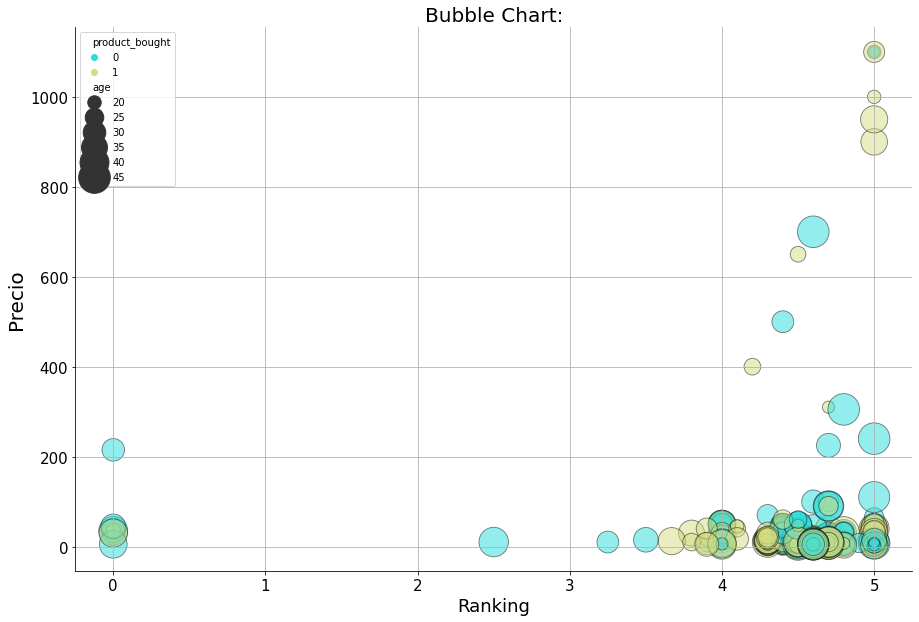

In [142]:
#Variable
data = df_all

#Setting the size of the chart.
plt.figure(figsize = (15,10))

#Setting the type of chart.
ax = sns.scatterplot(data=data, x="Review-AverageRating", y="DisplayPrice-Amount",
                    size="age",
                    sizes=(50,1000),
                    alpha=0.5,
                    hue="product_bought",
                    #hue_order=['0', '1'],
                    palette="rainbow",
                    edgecolor="black",
                    )

#Setting others parameters
#plt.legend(title="Relacion entre edad, precio y review", loc='best', fontsize= 16)    
#plt.legend(bbox_to_anchor=(1, 1),loc='best', fontsize=11, borderaxespad=2)

plt.title("Bubble Chart:", fontsize=20)
plt.xlabel("Ranking", fontsize= 18, color="black")
plt.ylabel("Precio", fontsize= 20, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
#plt.savefig('bubble_chart.png')


plt.show()

In [143]:
df_all.columns

Index(['modeild', 'weblabel', 'brand', 'catchline', 'productnature', 'family',
       'Review-AverageRating', 'DisplayPrice-Amount', 'ListPrice-Amount',
       'reco_id', 'time_reco', 'id_sender', 'id_reciever', 'id_product',
       'product_bought', 'person_id', 'complete_name', 'age', 'address'],
      dtype='object')

In [96]:
df_all['age'].isnull().sum()

11866

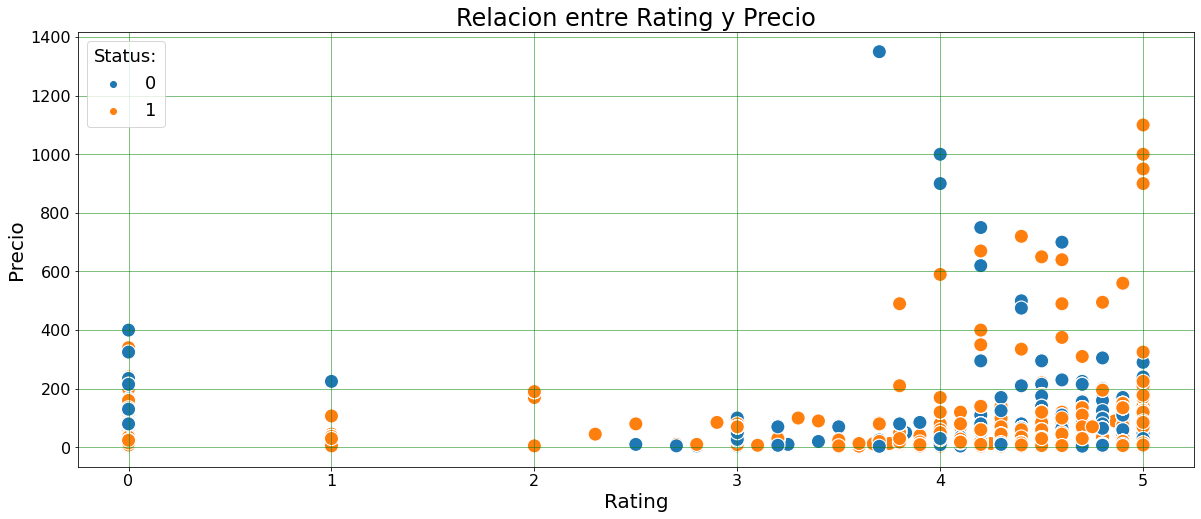

In [160]:
# Lest set the size of the figure
plt.figure(figsize =(20, 8))

#Choosing the type of chart
sns.scatterplot(data=df_all, x='Review-AverageRating', y='DisplayPrice-Amount',  hue="product_bought", s=200)

#Set title, labels, etc.

plt.title("Relacion entre Rating y Precio",fontsize=24)
plt.xlabel("Rating", fontsize=20)
plt.ylabel("Precio", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.legend(title="Status:", title_fontsize=18, fontsize=18, loc="best")

#plt.savefig('Scatterplot.png')
plt.show()

___

___

We see here that we do not have so many outliers for each class . The boxplot allows us to easily see these values, as well as the quartiles that are the extremes of each box and the average that would be the line that divides each box and the outliers are plotted as points.

___

 ## Predictive Model


In [172]:
df = df_reco

In [164]:
#Split the data between X and Y.

X = df.drop(['product_bought'], axis= 1)
y = df['product_bought']

print(X.shape)
print(y.shape)

(7000, 5)
(7000,)


In [165]:
#Split the DataSet between Train and Test, with stratified sampling method and train with 80%:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

___
## CatBoost Classifier Pipeline:

___

In [170]:
# Preprocedado
# ==============================================================================

# DataFrame with numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
# DataFrame with categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
# ==============================================================================
svd = TruncatedSVD()
#pca = PCA(0.95)



# Apply Robust Scaler to the numerical variables
numeric_transformer = Pipeline(
                        steps=[("imputer", SimpleImputer(strategy="mean")),('scaler', RobustScaler())]
                      )
                      
# Apply OneHotEncoder
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Combining the steps and create a Pipeline

pipe = Pipeline([('preprocessing', preprocessor),
                ('svd', TruncatedSVD(algorithm='randomized', n_components=7)),
                ('model',CatBoostClassifier(verbose=False))])

# Train
# ==============================================================================
# Fit the data
_ = pipe.fit(X=X_train, y=y_train)


#Predict the result:
pipe_pred = pipe.predict(X_test)

#Veamos las metricas de evaluación que obtuvimos:

print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred))
# Precision: 
precision_pipe = precision_score(pipe_pred, y_test, average='macro')
print('Precision:', precision_pipe)
# Recall: 
recall_pipe = recall_score(pipe_pred, y_test, average='macro')
print('Recall:', recall_pipe)
# f1 score
f1_pipe = f1_score(pipe_pred, y_test, average='macro')
print('F1:', f1_pipe)

Accuracy: 0.6457142857142857
Precision: 0.5676141257536607
Recall: 0.6308333333333334
F1: 0.5444765153503017


In [41]:
#5 cross-validation scores:
pipe_cv = cross_val_score(pipe,X,y,cv=5, scoring='f1_macro',  error_score='raise' ) 

#Show the values:
print(pipe_cv)
print("Average 5-Fold CV Score: {}".format(np.mean(pipe_cv)))
print('F1 First model:', f1_pipe)

[0.52417437 0.51941024 0.49460764 0.50047449 0.53138468]
Average 5-Fold CV Score: 0.514010285317618
F1 First model: 0.5296659336002005


We have our model a bit overfitting, lets change some parameter to see if we can improve the model.

___

___

Lets see the results with our Train set in a Confusion Matrix:

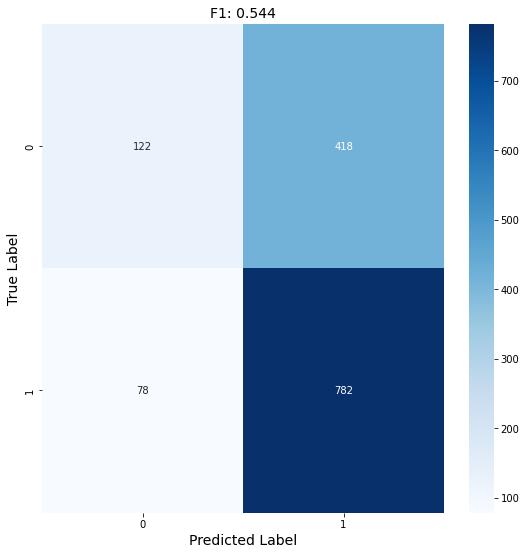

In [173]:
#Confusion Matrix:
cm_rf = confusion_matrix(y_test, pipe_pred)

#Confusion Matrix Plot:
plt.figure(figsize=(9,9))


ax = sns.heatmap(cm_rf, annot=True, fmt='', cmap='Blues')

title = 'F1: {0}'.format(f1_pipe.round(3))
ax.set_title(title, fontsize=14);


ax.set_xlabel('Predicted Label',fontsize=14)
ax.set_ylabel('True Label', fontsize=14);



##Mostramos la matriz.
plt.show()

Here we can see that the main diagonal shows the successes that the model had in classifying our target. While the other data correspond to what the algorithm predicted wrong.

___
___
Análisis de frecuencia de palabras: Si bien este ejemplo fue realizado con las descripciones de cada producto, se podria hacer los mismo con las reviews recibidas por los compradores, para posteriormente analizarlas.

In [174]:
#Import the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ignaciourzaizzuain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ignaciourzaizzuain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_user['catchline'].to_string(header=False, index=False)

In [175]:
text="""Indispensable para una buena altura de red.\n¡Durabilidad y control!Pelota oficial del torne...\n¡Pelota de competición a bajo precio!Nuevo empa...\nEste cordaje de tenis multifilamentos Babolat X...\nEste cordaje de tenis monofilamento Luxilon Alu...\nEl grip de tenis syntec pro Babolat es la refer...\nEsta bolsa puede contener 10 pelotas de tenis, ...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nLa madera IV L Balsa es muy ligera, adecuada pa...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nEl revestimiento de ping-pong Mark V Yasaka es ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl revestimiento de ping pong Mark V GPS tiene ...\nEl adhesivo del overgrip Head XTREME SOFT asegu...\nPuedes colocar este plomo en cualquier lugar pa...\nRevestimiento Pryde 30°, provisto de una espuma...\nRevestimiento Pryde 30°, provisto de una espuma""" #Example

In [179]:
text_sent_token=sent_tokenize(text)

#Tokenized text per word
text_word_token= word_tokenize(text)


fdist_word = FreqDist(text_word_token)

#Frequency of the most common word in text
fdist_word.most_common(2)

stop_words=set(stopwords.words("spanish"))

# fuctions we are going to use in this project
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = text.replace("—","")
    text = re.sub('\[.*?¿\]\%-', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
#
def clean_text2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

filtered_sent=[]
# for word in text_word_token:
#     #print(word)
#     if word not in stop_words:
#         print(word)
#         filtered_sent.append(w)
#  print("Tokenized Sentence:", text_sent_token[1])
#  print("="*120)
#  print("Filterd Sentence:",filtered_sent[1])


for sent in text_sent_token:
    sent_word_token = word_tokenize(sent)
    for word in sent_word_token:
        if word.lower() not in stop_words:
            filtered_sent.append(word)

print(filtered_sent)

# if sent_word_token not in stop_words:
#               print()
#              filtered_sent.append(w)

filtered_sent = [character for character in filtered_sent if character.isalnum()]

fdist_filter_sent = FreqDist(filtered_sent)
fdist_filter_sent

fdist_filter_sent = FreqDist(filtered_sent)
fdist_filter_sent

['Indispensable', 'buena', 'altura', 'red', '.', '¡Durabilidad', 'control', '!', 'Pelota', 'oficial', 'torne', '...', '¡Pelota', 'competición', 'bajo', 'precio', '!', 'Nuevo', 'empa', '...', 'cordaje', 'tenis', 'multifilamentos', 'Babolat', 'X', '...', 'cordaje', 'tenis', 'monofilamento', 'Luxilon', 'Alu', '...', 'grip', 'tenis', 'syntec', 'pro', 'Babolat', 'refer', '...', 'bolsa', 'puede', 'contener', '10', 'pelotas', 'tenis', ',', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'madera', 'IV', 'L', 'Balsa', 'ligera', ',', 'adecuada', 'pa', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'revestimiento', 'ping-pong', 'Mark', 'V', 'Yasaka', '...', 'revestimiento', 'ping', 'pong', 'Mark', 'V', 'GPS', '...', 'revestimiento', 'ping', 'pong', 'Mark', 'V', 'GPS', '...', 'reves

FreqDist({'revestimiento': 13, 'Mark': 13, 'V': 13, 'ping': 7, 'pong': 7, 'GPS': 7, 'Yasaka': 6, 'tenis': 4, 'cordaje': 2, 'Babolat': 2, ...})

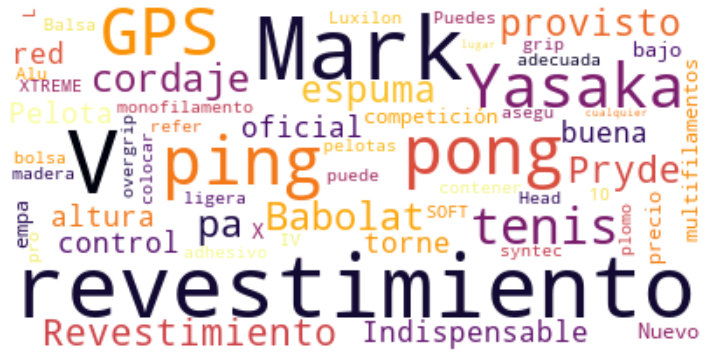

In [180]:
sns.set_context("paper")
plt.style.use('ggplot')
stop_words=set(stopwords.words("english"))
df_wordcloud = WordCloud(stopwords=stop_words,background_color="white",colormap='inferno',random_state=42).generate_from_frequencies(fdist_filter_sent)


fig, axes = plt.subplots(figsize =(10, 10))

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

___


___